In [1]:
from data_utils import read_all_candles, filter_assets
import pandas as pd
from deepdow.utils import raw_to_Xy
from deepdow.benchmarks import OneOverN
from deepdow.data import InRAMDataset, RigidDataLoader
from deepdow.experiments import Run
from deepdow.losses import MaximumDrawdown, SharpeRatio, StandardDeviation, RiskParity
from deepdow.nn import LinearNet, BachelierNet
from deepdow.nn import KeynesNet
from deepdow.nn import ThorpNet
from deepdow.layers import NCO, Cov2Corr, Resample, CovarianceMatrix, AverageCollapse, WeightNorm
from deepdow.benchmarks import Benchmark
import matplotlib.pyplot as plt
import numpy as np
import torch
from deepdow.callbacks import EarlyStoppingCallback
from submission_utils import general_weights_fixer, get_submission_markowitz, test_submission
from sklearn.model_selection import train_test_split
from opt_nets import ResampleNetwork


In [2]:
import torch

def cov(m, rowvar=False):
    '''Estimate a covariance matrix given data.

    Covariance indicates the level to which two variables vary together.
    If we examine N-dimensional samples, `X = [x_1, x_2, ... x_N]^T`,
    then the covariance matrix element `C_{ij}` is the covariance of
    `x_i` and `x_j`. The element `C_{ii}` is the variance of `x_i`.

    Args:
        m: A 1-D or 2-D array containing multiple variables and observations.
            Each row of `m` represents a variable, and each column a single
            observation of all those variables.
        rowvar: If `rowvar` is True, then each row represents a
            variable, with observations in the column  File "/anaconda3/envs/torch-xla-1.7/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 475, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIterations. Otherwise, the
            relationship is transposed: each column represents a variable,
            while the rows contain observations.

    Returns:
        The covariance matrix of the variables.
    '''
    if m.dim() > 2:
        raise ValueError('m has more than 2 dimensions')
    if m.dim() < 2:
        m = m.view(1, -1)
    if not rowvar and m.size(0) != 1:
        m = m.t()
    # m = m.type(torch.double)  # uncomment this line if desired
    fact = 1.0 / (m.size(1) - 1)
    m -= torch.mean(m, dim=1, keepdim=True)
    mt = m.t()  # if complex: mt = m.t().conj()
    return fact * m.matmul(mt).squeeze()

In [3]:
!ls trainTimeSeries/trainTimeSeries/

TrainCandles  TrainScores


In [4]:
w_pred[w_pred.index(max(w_pred))] -= decimal.Decimal(0.004)
In [545]:
￼
assets_0 = ['ACY',
 'AUX',
 'BZC',
 'CSB',
 'DZF',
 'EEY',
 'EOP',
 'ERO',
 'GFJ',
 'GGR',
 'GRU',
 'HQU',
 'HZY',
 'JNE',
 'LEN',
 'MUF',
 'NSC',
 'NYP',
 'OOS',
 'PPT',
 'RAT',
 'SBY',
 'SHC',
 'SKI',
 'TER',
 'USX',
 'VVC',
 'WWT',
 'WXN',
 'YEC']

In [5]:
assets_0 = ['DIG',
 'EOP',
 'ERO',
 'FSK',
 'GGR',
 'GRU',
 'MUF',
 'NSC',
 'NYP',
 'PME',
 'PPT',
 'REU',
 'SBY',
 'SKI',
 'TER',
 'TKT',
 'ULI',
 'USX',
 'WFJ',
 'YEC',
 'ZAB']

In [251]:
assets_0 = ['AUX',
 'AWW',
 'BFS',
 'BOT',
 'GRI',
 'NSC',
 'NYP',
 'RAT',
 'SBY',
 'SKI',
 'TER',
 'WFJ',
 'YEC', 'DIG', 'EEY', 'FSK', 'GGR', 'PME', 'ZTY', 'BAX',
 'BGN',
 'BZC',
 'DZF',
 'EOP',
 'ERQ',
 'FNM',
 'HEO',
 'JHI',
 'JNE',
 'MCA',
 'NVL',
 'OJG',
 'SYO',
 'TDD',
 'TKT',
 'ULI',
 'USX',
 'VRT',
 'VVC',
 'WXN',
 'YAX',
 'ZAB',
 'ZCD', 'NCT', 'YFC', 'NYD', 'TMF']

In [3]:
assets_yes = ['GRU',
 'TMF',
 'THA',
 'JTL',
 'LWK',
 'CIS',
 'VRT',
 'BAX',
 'DIG',
 'SHC',
 'LWE',
 'HEO',
 'AWW',
 'NYD',
 'ZUJ',
 'AUX',
 'PME',
 'ULT',
 'DZF',
 'ZCD',
 'USX',
 'SBY',
 'CSB',
 'ERO',
 'YAX',
 'PPT',
 'FIR',
 'OXR',
 'LHB',
 'EEY',
 'ERQ',
 'UPP',
 'RWJ',
 'HCC',
 'REU',
 'BZC',
 'GFJ',
 'SEH',
 'ACY',
 'SRI',
 'LEN',
 'WXN',
 'TRO',
 'SKI',
 'OJG',
 'OOS']

In [34]:
assets_yes = ['GRU',
 'TMF',
 'THA',
 'JTL',
 'LWK',
 'CIS',
 'VRT',
 'GRI',
 'BAX',
 'DIG',
 'SHC',
 'LWE',
 'HEO',
 'AWW',
 'NYD',
 'ZUJ',
 'AUX',
 'FFV',
 'PME',
 'ULT',
 'DZF',
 'ZAB',
 'ZCD',
 'USX',
 'SBY',
 'BFS',
 'CSB',
 'PHI',
 'ERO',
 'PEW',
 'YAX',
 'PPT',
 'WFJ',
 'FIR',
 'OXR',
 'LHB',
 'BOT',
 'TXR',
 'EEY',
 'ERQ',
 'LUG',
 'NCT',
 'UPP',
 'RWJ',
 'TDD',
 'AZG',
 'HCC',
 'REU',
 'SKN',
 'BZC',
 'GFJ',
 'SEH',
 'ACY',
 'TKT',
 'UEI',
 'MET',
 'YFC',
 'JHI',
 'NSC',
 'NWO',
 'SRI',
 'BGN',
 'LEN',
 'WXN',
 'TRO',
 'SKI',
 'IDT',
 'NYP',
 'SYO',
 'JNE',
 'OJG',
 'FNM',
 'MCA',
 'OOS']

In [131]:
assets_0 = ['HZY', 'LHB', 'SYO', 'TDD', 'TMF', 'VRT']


In [159]:
assets_0 = ['JTL',
 'LWK',
 'SHC',
 'PHI',
 'PEW',
 'LHB',
 'UEI',
 'MET',
 'YFC',
 'SRI',
 'ULI',
 'MCA', 'ACY',
 'DIG',
 'DZF',
 'EEY',
 'EOP',
 'ERO',
 'GGR',
 'GRU',
 'HEO',
 'HQU',
 'IDT',
 'LEN',
 'MUF',
 'NSC',
 'NWO',
 'NYP',
 'PPT',
 'SBY',
 'SKI',
 'TER',
 'VVC',
 'WWT',
 'WXN',
 'YEC',
 'ZTY',
 'ZVQ', 'AUX', 'LWE', 'OOS', 'MMY', 'PME', 'SKN', 'THA', 'XRX', 'YAX', 'HZY', 'RWJ']

In [50]:
assets_0 = ['ACY',
 'AUX',
 'AZG',
 'BGN',
 'BZC',
 'CSB',
 'DZF',
 'EEY',
 'EOP',
 'ERO',
 'GGR',
 'GRU',
 'HQU',
 'HZY',
 'IDT',
 'JNE',
 'LEN',
 'MMY',
 'NWO',
 'NYP',
 'PME',
 'PPT',
 'RAT',
 'RWJ',
 'SBY',
 'SHC',
 'SKI',
 'TDD',
 'TER',
 'THA',
 'ULI',
 'USX',
 'VVC',
 'WFJ',
 'WXN',
 'XRX',
 'YEC',
 'YFC',
 'ZTY',
 'ZVQ']

In [4]:
candles = read_all_candles()

Getting candles data for Darwins...: 100%|██████████| 96/96 [00:02<00:00, 45.65it/s]


In [5]:
candles2 = read_all_candles("darwins_complete_2803")

Getting candles data for Darwins...: 100%|██████████| 96/96 [00:01<00:00, 60.21it/s]


In [52]:
candles = {k:v for k,v in candles.items() if k not in assets_0}

In [54]:
# candles = {k:v for k,v in candles.items() if k in assets_yes}

In [55]:
candles.keys()

dict_keys(['NCT', 'YAX', 'OOS', 'GFJ', 'FIR', 'USX', 'FSK', 'TMF', 'TDD', 'ULT', 'CSB', 'CIS', 'UYZ', 'TRO', 'ZAB', 'HZY', 'PUL', 'JHI', 'LWE', 'SEH', 'AWW', 'GRI', 'REU', 'MMY', 'VRT', 'ZXW', 'LUG', 'CBY', 'WFJ', 'FFV', 'ZCD', 'AUX', 'BAX', 'HCC', 'JNE', 'UPP', 'XRX', 'NYD', 'BGN', 'THA', 'TKT', 'BFS', 'SKN', 'NVL', 'SYO', 'BZC', 'OXR', 'ZUJ', 'BSX', 'PME', 'FNM', 'ERQ', 'AZG', 'OJG', 'BOT', 'TXR', 'RAT', 'RWJ'])

In [40]:
#candles["ZVQ"].index

In [140]:
candles_remove = filter_assets(candles)

100%|██████████| 94/94 [00:01<00:00, 66.57it/s]


KeyboardInterrupt: 

In [11]:
len(candles_remove)

28

In [7]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [188]:
candles = {k:v for k,v in candles.items() if k not in candles_remove}

In [6]:
df = pd.concat(candles.values(),keys= candles.keys(),axis=1)


In [12]:
df2 = pd.concat(candles2.values(), keys=candles.keys(), axis=1)

In [8]:
df.isna().sum().sum()

673668

In [9]:
df.head()

ZVQ                           NCT                YAX  \
                      close     max     min    open close max min open close   
date                                                                           
2018-12-19 01:00:00  519.23  519.95  518.47  518.47   NaN NaN NaN  NaN   NaN   
2018-12-19 02:00:00  519.63  519.93  519.07  519.28   NaN NaN NaN  NaN   NaN   
2018-12-19 03:00:00  519.95  520.72  519.56  519.80   NaN NaN NaN  NaN   NaN   
2018-12-19 04:00:00  520.09  520.39  519.87  519.96   NaN NaN NaN  NaN   NaN   
2018-12-19 05:00:00  520.06  520.12  519.89  520.12   NaN NaN NaN  NaN   NaN   

                         ...    SRI          PHI                RWJ          \
                    max  ...    min   open close max min open close max min   
date                     ...                                                  
2018-12-19 01:00:00 NaN  ...  92.12  92.16   NaN NaN NaN  NaN   NaN NaN NaN   
2018-12-19 02:00:00 NaN  ...  92.09  92.19   NaN NaN NaN  NaN   NaN NaN NaN   
2018-12-19 03:00:00 NaN  ...  92.08  92.11   NaN NaN NaN  NaN   NaN NaN NaN   
2018-12-19 04:00:00 NaN  ...  92.03  92.12   NaN NaN NaN  NaN   NaN NaN NaN   
2018-12-19 05:00:00 NaN  ...  92.06  92.19   NaN NaN NaN  NaN   NaN NaN NaN   

                          
                    open  
date                      
2018-12-19 01:00:00  NaN  
2018-12-19 02:00:00  NaN  
2018-12-19 03:00:00  NaN  
2018-12-19 04:00:00  NaN  
2018-12-19 05:00:00  NaN  

[5 rows x 384 columns]

In [10]:
df.tail()

ZVQ                             NCT                  \
                      close     max     min    open   close     max     min   
date                                                                          
2020-06-17 19:00:00  570.35  570.35  570.35  570.35  132.92  132.92  132.45   
2020-06-17 20:00:00  570.35  570.35  570.35  570.35  132.92  132.92  132.45   
2020-06-17 21:00:00  570.35  570.35  570.35  570.35  132.92  132.92  132.92   
2020-06-17 22:00:00  570.35  570.35  570.35  570.35  132.92  132.92  132.92   
2020-06-17 23:00:00  570.35  570.35  570.35  570.35  132.92  132.92  132.92   

                                YAX          ...     SRI             PHI  \
                       open   close     max  ...     min    open   close   
date                                         ...                           
2020-06-17 19:00:00  132.88  129.68  129.68  ...  146.64  146.69  135.36   
2020-06-17 20:00:00  132.88  129.68  129.68  ...  146.77  146.86  135.36   
2020-06-17 21:00:00  132.92  129.68  129.68  ...  146.86  146.92  135.36   
2020-06-17 22:00:00  132.92  129.68  129.68  ...  146.89  146.92  135.36   
2020-06-17 23:00:00  132.92  129.68  129.68  ...  146.80  146.96  135.36   

                                                RWJ                          
                        max     min    open   close     max     min    open  
date                                                                         
2020-06-17 19:00:00  135.36  135.36  135.36  132.28  132.28  132.28  132.28  
2020-06-17 20:00:00  135.36  135.36  135.36  132.28  132.28  132.28  132.28  
2020-06-17 21:00:00  135.36  135.36  135.36  132.28  132.28  132.28  132.28  
2020-06-17 22:00:00  135.36  135.36  135.36  132.28  132.28  132.28  132.28  
2020-06-17 23:00:00  135.36  135.36  135.36  132.28  132.28  132.28  132.28  

[5 rows x 384 columns]

In [16]:
df2 = df2.loc[df2.index >= "2020-06-18"]

In [17]:
df2.head()

ZVQ                NCT                YAX      ...  \
                    close max min open close max min open close max  ...   
date                                                                 ...   
2020-06-18 00:00:00   NaN NaN NaN  NaN   NaN NaN NaN  NaN   NaN NaN  ...   
2020-06-18 01:00:00   NaN NaN NaN  NaN   NaN NaN NaN  NaN   NaN NaN  ...   
2020-06-18 02:00:00   NaN NaN NaN  NaN   NaN NaN NaN  NaN   NaN NaN  ...   
2020-06-18 03:00:00   NaN NaN NaN  NaN   NaN NaN NaN  NaN   NaN NaN  ...   
2020-06-18 04:00:00   NaN NaN NaN  NaN   NaN NaN NaN  NaN   NaN NaN  ...   

                          SRI                 PHI                      \
                          min      open     close       max       min   
date                                                                    
2020-06-18 00:00:00  146.8217  146.8941       NaN       NaN       NaN   
2020-06-18 01:00:00  146.5230  146.8765  135.2312  135.4027  134.9835   
2020-06-18 02:00:00  146.6702  146.7493  135.3316  135.3659  135.1477   
2020-06-18 03:00:00  146.8370  146.8370  135.5394  135.5470  135.3341   
2020-06-18 04:00:00  146.9467  147.0562       NaN       NaN       NaN   

                                RWJ               
                         open close max min open  
date                                              
2020-06-18 00:00:00       NaN   NaN NaN NaN  NaN  
2020-06-18 01:00:00  135.3464   NaN NaN NaN  NaN  
2020-06-18 02:00:00  135.2361   NaN NaN NaN  NaN  
2020-06-18 03:00:00  135.3341   NaN NaN NaN  NaN  
2020-06-18 04:00:00       NaN   NaN NaN NaN  NaN  

[5 rows x 384 columns]

In [18]:
df_total = pd.concat([df, df2])

In [21]:
df = df_total.copy()

In [7]:
after = df.index >= pd.to_datetime("2020-05-01")
df = df.loc[after]

In [6]:
df = df.resample("H").aggregate("mean")

In [22]:
df.isna().sum().sum()

1998724

In [23]:
raw_df = df.copy()

In [24]:
n_timesteps = len(raw_df)  # 20
n_channels = len(raw_df.columns.levels[1])  # 2
n_assets = len(raw_df.columns.levels[0])  # 2


In [25]:
n_timesteps, n_channels, n_assets

(14760, 4, 96)

In [26]:
lookback, gap, horizon = 60, 1, 60

X, timestamps, y, asset_names, indicators = raw_to_Xy(raw_df,
                                                      lookback=lookback,
                                                      gap=gap,
                                                      freq="B",
                                                      horizon=horizon)

In [27]:
X.shape

(432, 4, 60, 96)

In [28]:
returns = X[:, 0, :, :]

In [29]:
returns.mean(axis=0).mean(axis=0).shape

(96,)

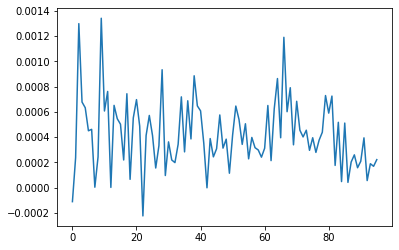

In [30]:
plt.plot(returns.mean(axis=0).mean(axis=0))

In [14]:
exp_returns = returns.mean(axis=0).mean(axis=0)

NameError: name 'returns' is not defined

In [31]:

dataset = InRAMDataset(X, y, timestamps=timestamps, asset_names=asset_names)

X_sample, y_sample, timestamp_sample, asset_names = dataset[0]

In [32]:
#X_sample[0][0]

In [33]:
len(dataset)

432

In [74]:
sp_ = len(dataset) - int(0.065*len(dataset))
sp_

320

In [34]:
ids_tr, ids_val = train_test_split(range(len(dataset)), test_size=0.25, random_state=42)

In [184]:
ids_tr, ids_val = list(range(sp_)), list(range(sp_, len(dataset)))

In [35]:
train_dataloader = RigidDataLoader(dataset, indices=ids_tr, batch_size=16) # list(range(sp_))
val_dataloaders = {'val': RigidDataLoader(dataset, indices=ids_val, batch_size=16)} # list(range(sp_, len(dataset)))

In [64]:
callbacks = [EarlyStoppingCallback("val", "loss", patience=3)]

In [30]:
max_weight = 0.2
hidden_size = 32
network = BachelierNet(n_channels, n_assets, hidden_size=hidden_size, max_weight=max_weight)


In [23]:
network

BachelierNet(
  (norm_layer): InstanceNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
  (transform_layer): RNN(
    (cell): LSTM(4, 16, bidirectional=True)
  )
  (dropout_layer): Dropout(p=0.5, inplace=False)
  (time_collapse_layer): AttentionCollapse(
    (affine): Linear(in_features=32, out_features=32, bias=True)
    (context_vector): Linear(in_features=32, out_features=1, bias=False)
  )
  (covariance_layer): CovarianceMatrix()
  (channel_collapse_layer): AverageCollapse()
  (portfolio_opt_layer): NumericalMarkowitz(
    (cvxpylayer): CvxpyLayer()
  )
)

In [25]:
loss = SharpeRatio(returns_channel=0)
benchmarks = {'1overN': OneOverN()}
metrics = {'drawdown': MaximumDrawdown(returns_channel=0)}

run = Run(network,
          loss,
          train_dataloader,
          val_dataloaders=val_dataloaders,
          metrics=metrics,
          benchmarks=benchmarks,
          device = torch.device("cuda:0"),
         callbacks=callbacks)

history = run.launch(n_epochs=30)

Epoch 0:   0%|          | 0/33 [00:00<?, ?it/s]

model   metric    epoch  dataloader
1overN  drawdown  -1     val           0.001
        loss      -1     val          -0.443


Epoch 10: 100%|██████████| 33/33 [00:12<00:00,  2.65it/s, loss=-0.40332, drawdown=0.00238, val_drawdown=0.00209, val_loss=-0.41256]


Training interrupted
Training stopped early because there was no improvement in val_loss for 5 epochs


In [26]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_entry',
 'database',
 'metrics',
 'metrics_per_epoch',
 'pretty_print']

In [27]:
history.pretty_print()

model    metric    epoch  dataloader
1overN   drawdown  -1     val           0.001
         loss      -1     val          -0.443
network  drawdown   0     val           0.002
                    1     val           0.002
                    2     val           0.002
                    3     val           0.002
                    4     val           0.002
                    5     val           0.002
                    6     val           0.002
                    7     val           0.002
                    8     val           0.002
                    9     val           0.002
                    10    val           0.002
         loss       0     val          -0.432
                    1     val          -0.432
                    2     val          -0.430
                    3     val          -0.438
                    4     val          -0.432
                    5     val          -0.439
                    6     val          -0.437
                    7     val          -0.4

In [28]:
#run.models["main"]

In [29]:
#run.models["main"].to("cpu")

In [30]:
#w_pred = run.models["main"](torch.ones(1, n_channels, lookback, n_assets).cpu())#.cpu().detach().numpy().squeeze()

In [171]:

hidden_size = 32
n_groups = 4
transform_type = 'Conv'

network2 = KeynesNet(n_channels,
                    hidden_size=hidden_size,
                    transform_type=transform_type,
                    n_groups=n_groups)

In [173]:
run2 = Run(network2,
          loss,
          train_dataloader,
          val_dataloaders=val_dataloaders,
          metrics=metrics,
          benchmarks=benchmarks,
          device = torch.device("cpu"),
          callbacks=callbacks, optimizer=torch.optim.Adam(network.parameters(), lr=0.0001))

history2 = run2.launch(n_epochs=30)


Epoch 0:   0%|          | 0/7 [00:00<?, ?it/s]

model   metric    epoch  dataloader
1overN  drawdown  -1     val           0.004
        loss      -1     val          -0.338



Epoch 0:  57%|█████▋    | 4/7 [00:19<00:16,  5.41s/it, loss=-0.33999, drawdown=0.00354]

Training interrupted


In [33]:
history2.pretty_print()

model    metric    epoch  dataloader
1overN   drawdown  -1     val           0.001
         loss      -1     val          -0.443
network  drawdown   0     val           0.001
                    1     val           0.001
                    2     val           0.001
                    3     val           0.001
                    4     val           0.001
                    5     val           0.001
         loss       0     val          -0.442
                    1     val          -0.441
                    2     val          -0.439
                    3     val          -0.439
                    4     val          -0.434
                    5     val          -0.432


In [368]:
network3 = LinearNet(n_channels, lookback, n_assets)


In [370]:
run3 = Run(network3,
          loss,
          train_dataloader,
          val_dataloaders=val_dataloaders,
          metrics=metrics,
          benchmarks=benchmarks,
          device = torch.device("cuda:0"),)
          #callbacks=callbacks)

history3 = run3.launch(n_epochs=30)



Epoch 0:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 0:   5%|▌         | 1/20 [00:00<00:00, 45.63it/s, loss=-0.25981, drawdown=0.01577]

Epoch 0:  10%|█         | 2/20 [00:00<00:00, 46.29it/s, loss=-0.31869, drawdown=0.01184]

Epoch 0:  15%|█▌        | 3/20 [00:00<00:00, 44.86it/s, loss=-0.30917, drawdown=0.01389]

Epoch 0:  20%|██        | 4/20 [00:00<00:00, 42.15it/s, loss=-0.30925, drawdown=0.01344]

Epoch 0:  25%|██▌       | 5/20 [00:00<00:00, 39.86it/s, loss=-0.30925, drawdown=0.01344]

Epoch 0:  25%|██▌       | 5/20 [00:00<00:00, 39.86it/s, loss=-0.29537, drawdown=0.01404]

Epoch 0:  30%|███       | 6/20 [00:00<00:00, 39.86it/s, loss=-0.30005, drawdown=0.01346]

Epoch 0:  35%|███▌      | 7/20 [00:00<00:00, 39.86it/s, loss=-0.29560, drawdown=0.01335]

Epoch 0:  40%|████      | 8/20 [00:00<00:00, 39.86it/s, loss=-0.28813, drawdown=0.01394]

model   metric    epoch  dataloader
1overN  drawdown  -1     val           0.001
        loss      -1     val          -0.500




Epoch 0:  45%|████▌     | 9/20 [00:00<00:00, 39.86it/s, loss=-0.27938, drawdown=0.01453]

Epoch 0:  50%|█████     | 10/20 [00:00<00:00, 42.59it/s, loss=-0.27938, drawdown=0.01453]

Epoch 0:  50%|█████     | 10/20 [00:00<00:00, 42.59it/s, loss=-0.27858, drawdown=0.01472]

Epoch 0:  55%|█████▌    | 11/20 [00:00<00:00, 42.59it/s, loss=-0.27763, drawdown=0.01470]

Epoch 0:  60%|██████    | 12/20 [00:00<00:00, 42.59it/s, loss=-0.27750, drawdown=0.01512]

Epoch 0:  65%|██████▌   | 13/20 [00:00<00:00, 42.59it/s, loss=-0.28032, drawdown=0.01525]

Epoch 0:  70%|███████   | 14/20 [00:00<00:00, 42.59it/s, loss=-0.26864, drawdown=0.01529]

Epoch 0:  75%|███████▌  | 15/20 [00:00<00:00, 41.58it/s, loss=-0.26864, drawdown=0.01529]

Epoch 0:  75%|███████▌  | 15/20 [00:00<00:00, 41.58it/s, loss=-0.26372, drawdown=0.01529]

Epoch 0:  80%|████████  | 16/20 [00:00<00:00, 41.58it/s, loss=-0.25971, drawdown=0.01529]

Epoch 0:  85%|████████▌ | 17/20 [00:00<00:00, 41.58it/s, loss=-0.25714, drawdown=0.01518]

Epoch 6:  65%|██████▌   | 13/20 [00:00<00:00, 47.63it/s, loss=-0.30166, drawdown=0.01564]

Epoch 6:  70%|███████   | 14/20 [00:00<00:00, 47.63it/s, loss=-0.30465, drawdown=0.01556]

Epoch 6:  75%|███████▌  | 15/20 [00:00<00:00, 46.80it/s, loss=-0.30465, drawdown=0.01556]

Epoch 6:  75%|███████▌  | 15/20 [00:00<00:00, 46.80it/s, loss=-0.30459, drawdown=0.01555]

Epoch 6:  80%|████████  | 16/20 [00:00<00:00, 46.80it/s, loss=-0.30542, drawdown=0.01539]

Epoch 6:  85%|████████▌ | 17/20 [00:00<00:00, 46.80it/s, loss=-0.30962, drawdown=0.01500]

Epoch 6:  90%|█████████ | 18/20 [00:00<00:00, 46.80it/s, loss=-0.30471, drawdown=0.01510]

Epoch 6:  95%|█████████▌| 19/20 [00:00<00:00, 46.80it/s, loss=-0.30905, drawdown=0.01491]

Epoch 6: 100%|██████████| 20/20 [00:00<00:00, 47.04it/s, loss=-0.30905, drawdown=0.01491]

Epoch 6: 100%|██████████| 20/20 [00:00<00:00, 47.04it/s, loss=-0.30740, drawdown=0.01511]

Epoch 6: 100%|██████████| 20/20 [00:00<00:00, 47.04it/s, loss=-0.30740, drawdown=0.01511, 

Epoch 12:  75%|███████▌  | 15/20 [00:00<00:00, 39.11it/s, loss=-0.30439, drawdown=0.01535]

Epoch 12:  80%|████████  | 16/20 [00:00<00:00, 39.11it/s, loss=-0.30411, drawdown=0.01515]

Epoch 12:  85%|████████▌ | 17/20 [00:00<00:00, 39.11it/s, loss=-0.30725, drawdown=0.01499]

Epoch 12:  90%|█████████ | 18/20 [00:00<00:00, 39.96it/s, loss=-0.30725, drawdown=0.01499]

Epoch 12:  90%|█████████ | 18/20 [00:00<00:00, 39.96it/s, loss=-0.31029, drawdown=0.01487]

Epoch 12:  95%|█████████▌| 19/20 [00:00<00:00, 39.96it/s, loss=-0.31219, drawdown=0.01494]

Epoch 12: 100%|██████████| 20/20 [00:00<00:00, 39.96it/s, loss=-0.31097, drawdown=0.01485]

Epoch 12: 100%|██████████| 20/20 [00:00<00:00, 39.96it/s, loss=-0.31097, drawdown=0.01485, val_drawdown=0.00970, val_loss=-0.24344]

Epoch 12: 100%|██████████| 20/20 [00:00<00:00, 35.90it/s, loss=-0.31097, drawdown=0.01485, val_drawdown=0.00970, val_loss=-0.24344]


Epoch 13:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 13:   5%|▌         | 1/20 [00:00<

Epoch 18:  80%|████████  | 16/20 [00:00<00:00, 43.48it/s, loss=-0.33396, drawdown=0.01451]

Epoch 18:  85%|████████▌ | 17/20 [00:00<00:00, 43.48it/s, loss=-0.32974, drawdown=0.01454]

Epoch 18:  90%|█████████ | 18/20 [00:00<00:00, 43.48it/s, loss=-0.32957, drawdown=0.01447]

Epoch 18:  95%|█████████▌| 19/20 [00:00<00:00, 43.48it/s, loss=-0.33047, drawdown=0.01441]

Epoch 18: 100%|██████████| 20/20 [00:00<00:00, 43.62it/s, loss=-0.33047, drawdown=0.01441]

Epoch 18: 100%|██████████| 20/20 [00:00<00:00, 43.62it/s, loss=-0.33023, drawdown=0.01434]

Epoch 18: 100%|██████████| 20/20 [00:00<00:00, 43.62it/s, loss=-0.33023, drawdown=0.01434, val_drawdown=0.00584, val_loss=-0.50683]

Epoch 18: 100%|██████████| 20/20 [00:00<00:00, 38.97it/s, loss=-0.33023, drawdown=0.01434, val_drawdown=0.00584, val_loss=-0.50683]


Epoch 19:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 19:   5%|▌         | 1/20 [00:00<00:00, 42.71it/s, loss=-0.25353, drawdown=0.01931]

Epoch 19:  10%|█         | 2/20 [00:00<0

Epoch 24:  95%|█████████▌| 19/20 [00:00<00:00, 33.18it/s, loss=-0.32958, drawdown=0.01387]

Epoch 24:  95%|█████████▌| 19/20 [00:00<00:00, 33.18it/s, loss=-0.32714, drawdown=0.01404]

Epoch 24: 100%|██████████| 20/20 [00:00<00:00, 33.18it/s, loss=-0.32643, drawdown=0.01411]

Epoch 24: 100%|██████████| 20/20 [00:00<00:00, 33.18it/s, loss=-0.32643, drawdown=0.01411, val_drawdown=0.00659, val_loss=-0.50171]

Epoch 24: 100%|██████████| 20/20 [00:00<00:00, 32.74it/s, loss=-0.32643, drawdown=0.01411, val_drawdown=0.00659, val_loss=-0.50171]


Epoch 25:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 25:   5%|▌         | 1/20 [00:00<00:00, 38.43it/s, loss=-0.33278, drawdown=0.01273]

Epoch 25:  10%|█         | 2/20 [00:00<00:00, 40.91it/s, loss=-0.32023, drawdown=0.01280]

Epoch 25:  15%|█▌        | 3/20 [00:00<00:00, 38.99it/s, loss=-0.30525, drawdown=0.01422]

Epoch 25:  20%|██        | 4/20 [00:00<00:00, 37.70it/s, loss=-0.30525, drawdown=0.01422]

Epoch 25:  20%|██        | 4/20 [00:00<00:0

In [65]:
max_weight = 0.15
force_symmetric = True
network = ThorpNet(n_assets, max_weight=max_weight, force_symmetric=force_symmetric)

In [66]:
#max_weight = 0.20
#force_symmetric=True

#network = ResampleNetwork(n_assets, force_symmetric=force_symmetric, max_weight=max_weight)

In [67]:
#loss = MaximumDrawdown(returns_channel=0) #SharpeRatio(returns_channel=0)
#loss = StandardDeviation()
loss = SharpeRatio(returns_channel=0)
benchmarks = {'1overN': OneOverN()}
metrics = {'drawdown': MaximumDrawdown(returns_channel=0), "sharpe": SharpeRatio(returns_channel=0)}

run = Run(network,
          loss,
          train_dataloader,
          val_dataloaders=val_dataloaders,
          metrics=metrics,
          benchmarks=benchmarks,
          device = torch.device("cpu"),
          optimizer=torch.optim.Adam(network.parameters(), lr=0.0001), callbacks=callbacks)

In [68]:
history = run.launch(n_epochs=150)

Epoch 0:   0%|          | 0/21 [00:00<?, ?it/s]

model   metric    epoch  dataloader
1overN  drawdown  -1     val           0.004
        loss      -1     val          -0.298
        sharpe    -1     val          -0.298


Epoch 22: 100%|██████████| 21/21 [00:53<00:00,  2.56s/it, loss=-0.55809, drawdown=0.00180, sharpe=-0.55809, val_drawdown=0.00178, val_loss=-0.55526, val_sharpe=-0.55526]


Training interrupted
Training stopped early because there was no improvement in val_loss for 3 epochs


In [112]:
history = run.launch(n_epochs=20)

Epoch 89: 100%|██████████| 4/4 [00:08<00:00,  2.01s/it, loss=0.00009, drawdown=0.00009, sharpe=-0.60836, val_drawdown=0.00010, val_loss=0.00010, val_sharpe=-0.62008]


In [25]:
history = run.launch(n_epochs=100)

Epoch 0:   0%|          | 0/13 [00:00<?, ?it/s]

model   metric    epoch  dataloader
1overN  drawdown  -1     val           0.003
        loss      -1     val          -0.379


Epoch 42: 100%|██████████| 13/13 [00:25<00:00,  1.98s/it, loss=-0.67855, drawdown=0.00149, val_drawdown=0.00145, val_loss=-0.69403]


Training interrupted
Training stopped early because there was no improvement in val_loss for 3 epochs


In [279]:
loss = SharpeRatio(returns_channel=0)
benchmarks = {'1overN': OneOverN()}
metrics = {'drawdown': MaximumDrawdown(returns_channel=0)}

run = Run(network,
          loss,
          train_dataloader,
          val_dataloaders=val_dataloaders,
          metrics=metrics,
          benchmarks=benchmarks,
          device = torch.device("cpu"),
          optimizer=torch.optim.Adam(network.parameters(), lr=0.0001))
#callbacks=callbacks,

history = run.launch(n_epochs=120)

Epoch 0:   0%|          | 0/3 [00:00<?, ?it/s]

model   metric    epoch  dataloader
1overN  drawdown  -1     val           0.001
        loss      -1     val          -0.596


Epoch 119: 100%|██████████| 3/3 [00:01<00:00,  1.55it/s, loss=-0.98938, drawdown=0.00046, val_drawdown=0.00052, val_loss=-0.94035]


In [117]:
loss = SharpeRatio(returns_channel=0)
benchmarks = {'1overN': OneOverN()}
metrics = {'drawdown': MaximumDrawdown(returns_channel=0)}

run = Run(network,
          loss,
          train_dataloader,
          val_dataloaders=val_dataloaders,
          metrics=metrics,
          benchmarks=benchmarks,
          device = torch.device("cpu"),
          optimizer=torch.optim.Adam(network.parameters(), lr=0.0001))
#callbacks=callbacks,

history = run.launch(n_epochs=50)


Epoch 0:   0%|          | 0/3 [00:00<?, ?it/s]

model   metric    epoch  dataloader
1overN  drawdown  -1     val           0.002
        loss      -1     val          -0.490


Epoch 3:  67%|██████▋   | 2/3 [00:09<00:04,  4.64s/it, loss=-0.56907, drawdown=0.00109]

Epoch 49: 100%|██████████| 3/3 [00:05<00:00,  1.68s/it, loss=-0.89804, drawdown=0.00028, val_drawdown=0.00042, val_loss=-0.88544]


In [29]:
loss = SharpeRatio(returns_channel=0)
benchmarks = {'1overN': OneOverN()}
metrics = {'drawdown': MaximumDrawdown(returns_channel=0)}

run = Run(network,
          loss,
          train_dataloader,
          val_dataloaders=val_dataloaders,
          metrics=metrics,
          benchmarks=benchmarks,
          device = torch.device("cuda:0"),
         callbacks=callbacks, optimizer=torch.optim.Adam(network.parameters(), lr=0.0001))

history = run.launch(n_epochs=4)

Training interrupted


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/alejandro.vaca/miniconda/envs/series_temporales/lib/python3.7/site-packages/deepdow/experiments.py", line 243, in launch
    self.on_train_begin(metadata={'n_epochs': n_epochs})
  File "/home/alejandro.vaca/miniconda/envs/series_temporales/lib/python3.7/site-packages/deepdow/experiments.py", line 305, in on_train_begin
    cb.on_train_begin(metadata=metadata)
  File "/home/alejandro.vaca/miniconda/envs/series_temporales/lib/python3.7/site-packages/deepdow/callbacks.py", line 140, in on_train_begin
    for batch, (X_batch, y_batch, timestamps_batch, _) in enumerate(dl):
  File "/home/alejandro.vaca/miniconda/envs/series_temporales/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 435, in __next__
    data = self._next_data()
  File "/home/alejandro.vaca/miniconda/envs/series_temporales/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 475, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may r

TypeError: object of type 'NoneType' has no len()

In [26]:
sum(p.numel() for p in network.parameters() if p.requires_grad)


9314

In [69]:
w_pred = run.models["main"].to("cpu")(torch.ones(1, n_channels, lookback, n_assets).cpu()).cpu().detach().numpy().squeeze()

In [31]:
weight_norm = WeightNorm(96)

In [32]:
w_pred = weight_norm(w_pred)

In [70]:
w_pred = run.models["main"].to("cpu")(torch.ones(1, n_channels, lookback, n_assets).cpu()).cpu().detach().numpy().squeeze()

In [114]:
w_pred

array([-2.62737075e-07, -3.14467201e-07, -6.69119061e-07, -4.23911530e-07,
       -2.84462999e-07,  1.88249182e-02, -3.03808264e-07,  2.30111927e-02,
        9.80926119e-03, -4.13975840e-07, -3.07229698e-07,  8.51758930e-04,
        3.00458577e-02, -7.15574686e-07, -4.53559068e-07,  2.97557423e-03,
        1.64911542e-02,  1.96695738e-02,  3.24113369e-02, -2.83083466e-07,
        2.61070244e-02, -2.26081298e-07,  2.63898838e-02,  1.03538316e-02,
       -4.41546206e-07, -2.97599655e-07,  2.94060186e-02,  4.85594338e-03,
        2.80135348e-02,  2.57296097e-02,  9.05200839e-03,  1.66217573e-02,
        1.45180644e-02,  2.94755474e-02,  1.43525759e-02,  1.98897813e-02,
        9.66202235e-04,  1.40720746e-02, -2.64721791e-07, -2.56784006e-07,
        2.31434684e-02,  1.76330470e-02,  1.98562033e-02,  1.19226975e-02,
        2.81661674e-02, -2.90208305e-07, -2.52157406e-07,  2.08848268e-02,
       -3.30200550e-07,  2.13195495e-02,  7.50493770e-03,  1.26519124e-03,
       -3.39797339e-07,  

In [28]:
assets_0 = [asset for asset, weight in zip(asset_names, w_pred) if weight <= 0.0]

In [29]:
any([asset in assets_0 for asset in ["CBY", "UYZ", "WFJ", "TXR", "SYO"]])

True

In [30]:
len(assets_0)

35

In [111]:
#assets_0

In [112]:
sum(w_pred)

0.9999999700859001

In [428]:
w_pred

array([-2.8468114e-07, -2.6644244e-07, -4.6836706e-07, -5.5984918e-07,
       -2.7333232e-07,  1.7907983e-02, -3.1409618e-07,  2.3995781e-02,
        9.4787236e-03, -4.8492547e-07, -4.2692176e-07, -2.3636568e-07,
        3.1525899e-02, -1.3907646e-07, -5.4927159e-07,  2.1319108e-03,
        1.5865525e-02,  1.9202486e-02,  3.4919456e-02, -2.9851830e-07,
        2.7520956e-02, -2.6199587e-07,  2.7954396e-02,  1.0511356e-02,
        7.7007792e-04, -3.1040074e-07,  3.2183889e-02,  4.7243787e-03,
        2.8849950e-02,  2.7151486e-02,  9.2139281e-03,  1.6171919e-02,
        1.4297063e-02,  2.9828079e-02,  1.3057756e-02,  1.8611569e-02,
       -3.0326578e-07,  1.1947364e-02, -2.8785254e-07, -2.9760758e-07,
        2.3234243e-02,  1.6919238e-02,  1.9987982e-02,  1.1357440e-02,
        3.1746134e-02, -2.9889796e-07, -2.6028948e-07,  1.9822972e-02,
       -2.9726885e-07,  2.3421546e-02,  8.0904253e-03,  1.1794226e-03,
       -4.3605897e-07,  1.1742058e-03,  5.2253800e-03,  4.5113377e-03,
      

In [114]:
all([w >= 0.0 for w in w_pred])

False

In [70]:
w_pred = np.clip(w_pred, 0, 1)

In [395]:
w_pred = np.round(w_pred, decimals=2)

In [73]:
w_pred = w_pred / w_pred.sum()

In [74]:
w_pred.sum()

1.0

In [411]:
def general_weights_fixer(lista):
    while sum(lista) != 1:
        lista = np.clip(lista, 0, 1)
        lista = [round(act, 4) for act in lista]
        suma = sum(lista)
        if suma > 1:
            sobra = suma - 1
            idx = np.argmax(lista)
            lista[idx] -= sobra
        elif suma < 1:
            falta = 1 - suma
            idx = np.argmax(lista)
            lista[idx] += falta
    return lista

In [491]:
def special_fixer(lista):
    lista = np.clip(lista, 0, 1)
    lista = [round(act, 2) for act in lista]
    print(sum(lista))
    index_min = lista.index(min([l for l in lista if l > 0]))
    print(lista[index_min])
    lista[index_min] = 0
    print(sum(lista))
    #lista[index_min] = 

In [538]:
def special_fixer(lista):
    import decimal
    if isinstance(lista, np.ndarray):
        lista = lista.tolist()
    newlist = []
    lista = np.clip(lista, 0, 1)
    for elem in lista:
        if elem == 0:
            newlist.append(round(decimal.Decimal(elem), 0))
        else:
            if abs(decimal.Decimal(str(elem)).as_tuple().exponent) > 2:
                newlist.append(round(decimal.Decimal(elem), 3))
        #print(sum(newlist))
    if sum(newlist) > 1:
        resto = decimal.Decimal(1-sum(newlist))
        maximo = newlist.index(max(newlist))
        newlist[maximo] = decimal.Decimal(newlist[maximo] - resto)
    elif sum(newlist) < 1:
        resto = decimal.Decimal(sum(newlist) - 1)
        maximo = newlist.index(max(newlist))
        newlist[maximo] = decimal.Decimal(newlist[maximo] + resto)
    print(sum(newlist))
    return newlist

In [66]:
import csv

In [102]:
def special_submission(weights, dates=None, assets=None):
    weights = np.clip(weights, 0, 1)
    def fix_weights(weights):
        new_weights = []
        for weight in weights:
            weight_str = str(weight)
            if "e" not in weight_str:
                weight_str = weight_str[:4]
                if all([w in ["0", "."] for w in weight_str]):
                    weight_str = "0"
            else:
                weight_str="0"
            #print(weight_str)
            new_weights.append(weight_str)
        
        weights_floats = [float(s) for s in new_weights]
        print(sum(weights_floats))
        max_pos = weights_floats.index(max(weights_floats))
        print(new_weights[max_pos])
        suma_str = str(sum(weights_floats))[:4]
        resto = 1-float(suma_str)
        resto_str = str(resto)[:4]
        new_weights[max_pos] = "0.065"
        return new_weights
    newweights = fix_weights(weights)
    with open("submission_2703.csv", "w") as f:
        writer = csv.writer(f)
        asset_names_row = ["eod_ts"] + [f"allo_{asset}" for asset in assets]
        writer.writerow(asset_names_row)
        for i in range(len(dates)):
            weights_this = [dates[i]] + newweights
            writer.writerow(weights_this)
    return newweights

In [103]:
ws = special_submission(w_pred, date, asset_names)

0.6900000000000003
0.02


In [104]:
ws

['0',
 '0',
 '0',
 '0',
 '0',
 '0.01',
 '0',
 '0.065',
 '0.01',
 '0',
 '0',
 '0',
 '0.02',
 '0',
 '0',
 '0',
 '0.01',
 '0.01',
 '0.02',
 '0',
 '0.02',
 '0',
 '0.02',
 '0.01',
 '0',
 '0',
 '0.02',
 '0',
 '0.02',
 '0.02',
 '0',
 '0.01',
 '0.01',
 '0.02',
 '0.01',
 '0.01',
 '0',
 '0.01',
 '0',
 '0',
 '0.02',
 '0.01',
 '0.02',
 '0.01',
 '0.02',
 '0',
 '0',
 '0.01',
 '0',
 '0.01',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0.01',
 '0.02',
 '0.02',
 '0.01',
 '0',
 '0.02',
 '0.01',
 '0',
 '0',
 '0',
 '0',
 '0.01',
 '0.01',
 '0',
 '0.01',
 '0.01',
 '0',
 '0',
 '0.02',
 '0.02',
 '0.01',
 '0.01',
 '0',
 '0',
 '0.01',
 '0',
 '0',
 '0.01',
 '0',
 '0.02',
 '0',
 '0.02',
 '0',
 '0',
 '0.02',
 '0',
 '0.02',
 '0',
 '0',
 '0.02',
 '0']

In [70]:
subm_plantilla = pd.read_csv("./submission/submission.csv")
date = subm_plantilla["eod_ts"].tolist()

In [85]:
w_ints = [int(w.replace(".", "")) for w in ws]

In [86]:
sum(w_ints)

1000

In [59]:
0.029+0.036

0.065

In [540]:
w_pred = special_fixer(w_pred)

1.004


In [541]:
sum(w_pred)

Decimal('1.004')

In [543]:
import decimal

In [544]:
w_pred[w_pred.index(max(w_pred))] -= decimal.Decimal(0.004)

In [545]:
sum(w_pred)

Decimal('0.9999999999999999999167332732')

In [76]:
w_pred = general_weights_fixer(w_pred)

In [ ]:
w_pred[np.argmax(w_pred)] = w_pred[np.argmax(w_pred)] - 0.02

In [300]:
np.argmax(w_pred)

18

In [301]:
w_pred[18] += 0.001000046730041504


In [55]:
w_pred = general_weights_fixer(w_pred)

In [387]:
#w_pred = w_pred / w_pred.sum()

In [388]:
#w_pred = w_pred / w_pred.sum()

In [151]:
w_pred = w_pred / sum(w_pred)

In [311]:
w_pred[18] = w_pred[18] - 0.000000047730282

In [77]:
sum(w_pred)

1.0

In [78]:
w_pred.sum()

AttributeError: 'list' object has no attribute 'sum'

In [393]:
w_pred[5]

0.01850000023841858

In [147]:
sum(w_pred)

1.0000000301661203

In [146]:
w_pred = w_pred / sum(w_pred)

In [79]:
dict_weights = {asset:weight for asset,weight in zip(asset_names, w_pred)}

In [80]:
sum(dict_weights.values())

1.0

In [322]:
w_pred = w_pred.astype(np.float16)

In [188]:
#df_daily = df.resample("D").aggregate("mean")

In [153]:
#df_daily_after = df_daily.loc[df_daily.index >= "2020-05-01"]

In [55]:
candles_closes = {k:v[["close"]] for k, v in candles.items()}

In [323]:
w_pred.sum()

1.0

In [56]:
def _process_df(df, name):
    df.columns = [name]
    return df

In [57]:
candle_closes = {k: _process_df(v, k) for k, v in candles_closes.items()}

In [58]:
df_closes = pd.concat(candles_closes.values(), keys=candles_closes.keys(), axis=1)

In [59]:
df_closes.columns = df_closes.columns.droplevel()

In [60]:
df_daily = df_closes.resample("D").aggregate("mean")

In [61]:
df_daily = df_daily.pct_change()
df_daily_after = df_daily.loc[df_daily.index >= "2020-05-01"]

In [86]:
from tqdm import tqdm
import numpy as np
perc_returns = []

for _, row in tqdm(df_daily_after.iterrows()):
    perc_returns.append(
        np.dot(w_pred, row.values)
    )

48it [00:00, 6537.00it/s]


In [87]:
(np.mean(perc_returns) / np.std(perc_returns))**(2/12)

0.8589561152495279

In [88]:
np.std(perc_returns)

0.0006805120478172991

In [174]:
(np.mean(perc_returns) / np.std(perc_returns))**(2/12)

0.7678111753795451

In [194]:
np.mean(perc_returns)

0.00027905598867840873

In [176]:
np.std(perc_returns)

0.0012377100934740635

In [568]:
#perc_returns

In [119]:
sum(dict_weights.values())

1.0

In [49]:
#list(sorted(dict_weights, key=dict_weights.get, reverse=True))

In [48]:
#list(sorted(dict_weights, key=dict_weights.get, reverse=True))

In [157]:
def get_submission_markowitz(weights, assets):
    #weights = _fix_weights(weights)
    subm_plantilla = pd.read_csv("./submission/submission.csv")
    date = subm_plantilla["eod_ts"]
    cols = {
        f"allo_{asset.replace('_close', '')}": [weights[f"{asset}"]] * len(date) for asset in assets
    }
    return pd.DataFrame({"eod_ts": date, **cols}).set_index("eod_ts")

In [45]:
df_sub = pd.DataFrame(data=np.repeat([w_pred], 2229, axis=0), columns = asset_names)

In [46]:
all(df_sub.sum(axis=1) == 1)

True

In [109]:
df_sub = df_sub.div(df_sub.sum(axis=1), axis=0)

In [47]:
test_submission(df_sub)

In [48]:
subm_plantilla = pd.read_csv("./submission/submission.csv")
date = subm_plantilla["eod_ts"]

In [49]:
df_sub.set_index(date, inplace=True)

In [81]:
submission = get_submission_markowitz(dict_weights, asset_names)

In [82]:
all(submission.sum(axis=1) == 1)

True

In [83]:
all(submission.dtypes == float)

True

In [84]:
submission.iloc[0,:].values[18]

0.0020000000949949026

In [439]:
df_sub.iloc[0,:].values

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.0179, 0.    , 0.024 ,
       0.0095, 0.    , 0.    , 0.    , 0.0315, 0.    , 0.    , 0.0021,
       0.0159, 0.0192, 0.0351, 0.    , 0.0275, 0.    , 0.028 , 0.0105,
       0.0008, 0.    , 0.0322, 0.0047, 0.0288, 0.0272, 0.0092, 0.0162,
       0.0143, 0.0298, 0.0131, 0.0186, 0.    , 0.0119, 0.    , 0.    ,
       0.0232, 0.0169, 0.02  , 0.0114, 0.0317, 0.    , 0.    , 0.0198,
       0.    , 0.0234, 0.0081, 0.0012, 0.    , 0.0012, 0.0052, 0.0045,
       0.0298, 0.0294, 0.0117, 0.    , 0.0272, 0.0093, 0.0107, 0.    ,
       0.    , 0.    , 0.0152, 0.0119, 0.    , 0.0115, 0.0147, 0.    ,
       0.    , 0.0238, 0.0195, 0.0089, 0.0108, 0.    , 0.0023, 0.0158,
       0.    , 0.    , 0.0179, 0.0046, 0.0233, 0.    , 0.0208, 0.    ,
       0.    , 0.025 , 0.0067, 0.0246, 0.    , 0.    , 0.0263, 0.0037])

In [476]:
submission = submission.div(submission.sum(axis=1), axis=0)

In [85]:
test_submission(submission)

In [162]:
test_submission(submission)

In [587]:
df_sub.iloc[0,:].values

array([0.00000000e+00, 1.45989321e-02, 1.43861296e-02, 4.21040272e-03,
       3.21725830e-02, 2.21164478e-03, 1.59510807e-03, 4.12489008e-03,
       2.70100217e-02, 5.17307781e-03, 1.59398746e-02, 1.53093245e-02,
       1.33742113e-02, 3.83494655e-03, 0.00000000e+00, 0.00000000e+00,
       6.90140296e-04, 0.00000000e+00, 2.18918826e-02, 1.53053161e-02,
       3.95308062e-03, 9.05122515e-03, 0.00000000e+00, 6.75635133e-03,
       4.49887430e-03, 8.03503301e-03, 1.64335361e-07, 6.09163567e-03,
       5.71171893e-03, 1.17649417e-03, 0.00000000e+00, 0.00000000e+00,
       2.43258867e-02, 6.68137916e-04, 3.26395221e-02, 1.40129414e-03,
       9.57918447e-03, 1.12057636e-02, 0.00000000e+00, 1.52776539e-02,
       0.00000000e+00, 5.71099808e-03, 3.46641131e-02, 1.53650697e-02,
       1.96753405e-02, 4.54254402e-03, 0.00000000e+00, 1.07159987e-02,
       1.71871409e-02, 0.00000000e+00, 5.82815893e-03, 0.00000000e+00,
       1.99737195e-02, 1.63378157e-02, 2.84672454e-02, 2.18203980e-02,
      

In [176]:
submission.iloc[0,:].values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.85000002e-02, 0.00000000e+00, 2.34999992e-02,
       9.80000012e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.06000002e-02, 0.00000000e+00, 0.00000000e+00, 2.79999990e-03,
       1.59000009e-02, 1.96000002e-02, 3.36000008e-02, 0.00000000e+00,
       2.67999992e-02, 0.00000000e+00, 2.72000004e-02, 1.05999997e-02,
       3.99999990e-04, 0.00000000e+00, 3.07000000e-02, 4.80000023e-03,
       2.85000000e-02, 2.64999997e-02, 9.20000020e-03, 1.62000004e-02,
       1.41000003e-02, 2.94000003e-02, 1.37000000e-02, 1.93000007e-02,
       9.99999975e-05, 1.32999998e-02, 0.00000000e+00, 0.00000000e+00,
       2.30000000e-02, 1.75000001e-02, 2.01999992e-02, 1.15999999e-02,
       3.03000007e-02, 0.00000000e+00, 0.00000000e+00, 2.01999992e-02,
       0.00000000e+00, 2.22999994e-02, 7.79999979e-03, 1.30000000e-03,
       0.00000000e+00, 1.30000000e-03, 5.29999984e-03, 6.80000009e-03,
      

In [413]:
sum(n < 0 for n in submission.iloc[:, 1:].values.flatten())

0

In [640]:
df_sub = df_sub.astype(np.float16)

In [338]:
df_sub = df_sub.div(df_sub.sum(axis=1), axis=0)

In [245]:
df_sub = df_sub.astype(np.float32)

In [588]:
df_sub.astype(float).div(df_sub.sum(axis=1), axis=0).to_csv("submission_2603_2.csv", header=True, index=True)# , float_precision='round_trip')

In [246]:
df_sub.iloc[0,:].values

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.8477086e-02, 0.0000000e+00, 2.3535321e-02,
       9.8393075e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       3.0553199e-02, 0.0000000e+00, 0.0000000e+00, 2.8049545e-03,
       1.5937090e-02, 1.9612409e-02, 3.3682685e-02, 0.0000000e+00,
       2.6838323e-02, 0.0000000e+00, 2.7171655e-02, 1.0564563e-02,
       4.4521887e-04, 0.0000000e+00, 3.0676577e-02, 4.8290952e-03,
       2.8457163e-02, 2.6459334e-02, 9.1716582e-03, 1.6155057e-02,
       1.4143557e-02, 2.9429456e-02, 1.3728809e-02, 1.9265421e-02,
       5.9583581e-05, 1.3279643e-02, 0.0000000e+00, 0.0000000e+00,
       2.3031456e-02, 1.7463757e-02, 2.0181036e-02, 1.1559539e-02,
       3.0250018e-02, 0.0000000e+00, 0.0000000e+00, 2.0170992e-02,
       0.0000000e+00, 2.2295335e-02, 7.7851103e-03, 1.3100536e-03,
       0.0000000e+00, 1.2508037e-03, 5.3152116e-03, 6.8090158e-03,
       2.8805181e-02, 2.8878961e-02, 1.1826767e-02, 0.0000000e

In [441]:
df_sub.head()

,allo_ACY,allo_AUX,allo_AWW,allo_AZG,allo_BAX,allo_BFS,allo_BGN,allo_BOT,allo_BSX,allo_BZC,...,allo_XRX,allo_YAX,allo_YEC,allo_YFC,allo_ZAB,allo_ZCD,allo_ZTY,allo_ZUJ,allo_ZVQ,allo_ZXW
eod_ts,,,,,,,,,,,,,,,,,,,,,
2020-08-18 00:00:00,0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.024,0.009,0.000,...,0.021,0.000,0.000,0.025,0.007,0.025,0.000,0.000,0.026,0.004
2020-08-18 01:00:00,0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.024,0.009,0.000,...,0.021,0.000,0.000,0.025,0.007,0.025,0.000,0.000,0.026,0.004
2020-08-18 02:00:00,0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.024,0.009,0.000,...,0.021,0.000,0.000,0.025,0.007,0.025,0.000,0.000,0.026,0.004
2020-08-18 03:00:00,0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.024,0.009,0.000,...,0.021,0.000,0.000,0.025,0.007,0.025,0.000,0.000,0.026,0.004
2020-08-18 04:00:00,0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.024,0.009,0.000,...,0.021,0.000,0.000,0.025,0.007,0.025,0.000,0.000,0.026,0.004


In [456]:
df_sub = df_sub.round(2)

In [461]:
df_sub = df_sub.div(df_sub.sum(axis=1), axis=0)

In [50]:
df_sub.columns = [f"allo_{col}" for col in df_sub.columns]

In [107]:
df_sub.columns = [f"allo_{col.replace('allo_', '')}" for col in df_sub.columns]

In [51]:
test_submission(df_sub)

In [52]:
df_sub.to_csv("submission_2803.csv", header=True, index=True)

In [86]:
submission.to_csv("submission_2803_2.csv", header=True, index=True)

In [87]:
a = pd.read_csv("submission_2803_2.csv", parse_dates=True, index_col="eod_ts")

In [88]:
test_submission(a)

AssertionError: 

In [149]:
a.iloc[0,:].values

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.01 , 0.   , 0.065, 0.01 ,
       0.   , 0.   , 0.   , 0.02 , 0.   , 0.   , 0.   , 0.01 , 0.01 ,
       0.02 , 0.   , 0.02 , 0.   , 0.02 , 0.01 , 0.   , 0.   , 0.02 ,
       0.   , 0.02 , 0.02 , 0.   , 0.01 , 0.01 , 0.02 , 0.01 , 0.01 ,
       0.   , 0.01 , 0.   , 0.   , 0.02 , 0.01 , 0.02 , 0.01 , 0.02 ,
       0.   , 0.   , 0.01 , 0.   , 0.01 , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.01 , 0.02 , 0.02 , 0.01 , 0.   , 0.02 , 0.01 , 0.   ,
       0.   , 0.   , 0.   , 0.01 , 0.01 , 0.   , 0.01 , 0.01 , 0.   ,
       0.   , 0.02 , 0.02 , 0.01 , 0.01 , 0.   , 0.   , 0.01 , 0.   ,
       0.   , 0.01 , 0.   , 0.02 , 0.   , 0.02 , 0.   , 0.   , 0.02 ,
       0.   , 0.02 , 0.   , 0.   , 0.02 , 0.   ])

In [93]:
sum(a.iloc[0,:].values)

1.0000000000000007

In [95]:
a.iloc[0,:].values.sum() == 1

True

In [96]:
all(a.sum(axis=1) == 1)

False

In [98]:
a.sum(axis=1)[0]

1.0000000000000007

In [481]:
a.iloc[0,:].values == df_sub.iloc[0,:].values

array([ True,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
        True,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False, False,  True,
        True, False, False, False,  True, False,  True,  True, False,
       False, False,  True,  True, False, False])

In [482]:
a.iloc[0,:].values.sum()

0.999999999999997

In [140]:
test_submission(a)

AssertionError: 

In [112]:
sum(a.iloc[0,:])

1.0

In [ ]:
class NCONet(torch.nn.module, Benchmark):
    def __init__(self, n_clusters, n_init=10, init='random', random_state=None):
        super().__init__()
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.init = init
        self.random_state = random_state

In [102]:


class MyNetwork(torch.nn.Module, Benchmark):
    def __init__(
        self, 
        n_assets,
        exp_returns,
        max_weight=0.2,
        force_symmetric=True,
        n_clusters=5,
        n_init=10,
        init="random",
        random_state=None
    ):
        super().__init__()
        self.force_symmetric = force_symmetric
        self.matrix = torch.nn.Parameter(torch.eye(n_assets), requires_grad=True)
        self.exp_returns = torch.nn.Parameter(torch.zeros(n_assets), requires_grad=True) #torch.FloatTensor(n_assets).uniform_(-0.001, 0.001))#torch.tensor(exp_returns), requires_grad=True) #torch.zeros(n_assets), requires_grad=True)
        self.gamma_sqrt = torch.nn.Parameter(torch.ones(1), requires_grad=True)
        self.alpha = torch.nn.Parameter(torch.ones(1), requires_grad=True)
        #self.n_clusters = torch.nn.Parameter() # TODO: TRY TO IMPLEMENT THIS DIFFERENTIABLE.
        
        self.portfolio_opt_layer = NCO(n_clusters, n_init, init, random_state)
    
    
    def forward(self, x, external_x=None):
        """
        Receives normal x (returns etc) and external_x,
        which can be composed of as many variables as we want.
        In this case it will be used for sp500, interest rates,
        oil, etc.
        """
        n = len(x)
        
        covariance = torch.mm(self.matrix, torch.t(self.matrix)) if self.force_symmetric else self.matrix
        exp_returns_all = torch.repeat_interleave(self.exp_returns[None, ...], repeats=n, dim=0)
        
        covariance_all = torch.repeat_interleave(covariance[None, ...], repeats=n, dim=0)
        #gamma_all = torch.ones(len(x)).to(device=x.device, dtype=x.dtype) * self.gamma_sqrt
        #alpha_all = torch.ones(len(x)).to(device=x.device, dtype=x.dtype) * self.alpha
        weights = self.portfolio_opt_layer(covariance_all, exp_returns_all)
        return weights

        @property
        def hparams(self):
            """Hyperparameters relevant to construction of the model."""
            return {k: v if isinstance(v, (int, float, str)) else str(v) for k, v in self._hparams.items() if k != 'self'}

In [21]:
class ResampleNetwork(torch.nn.Module, Benchmark):
    def __init__(
        self, 
        n_assets,
        max_weight=0.2,
        force_symmetric=True,
        n_clusters=5,
        n_init=10,
        init="random",
        random_state=None
    ):
        super().__init__()
        self.force_symmetric = force_symmetric
        #self.matrix = torch.nn.Parameter(torch.eye(n_assets), requires_grad=True)
        #self.exp_returns = torch.nn.Parameter(torch.zeros(n_assets), requires_grad=True)
        #self.gamma_sqrt = torch.nn.Parameter(torch.ones(1), requires_grad=True)
        #self.alpha = torch.nn.Parameter(torch.ones(1), requires_grad=True)
        #self.n_clusters = torch.nn.Parameter() # TODO: TRY TO IMPLEMENT THIS DIFFERENTIABLE.
        self.matrix = torch.nn.Parameter(torch.eye(n_assets), requires_grad=True)
        self.exp_returns = torch.nn.Parameter(torch.zeros(n_assets), requires_grad=True)
        self.covariance_layer = CovarianceMatrix(sqrt=False, shrinkage_strategy="diagonal")
        self.collapse_layer = AverageCollapse(collapse_dim=3)
        self.portfolio_opt_layer =  Resample(
            allocator=NCO(n_clusters=n_clusters, n_init=n_init, init=init, random_state=random_state),
            n_draws=100,
            n_portfolios=50,
        )  #NCO(n_clusters, n_init, init, random_state)
        
    def forward(self, x):
        #returns = torch.nn.Parameter(x[:, 0 ,:, :], requires_grad=True)
        #exp_returns = x[:, 0, :, :].mean(dim=1)
        #returns = x[:, 0, :, :]
        #exp_returns = returns.mean(dim=1)
        #covmat = self.covariance_layer(returns) #torch.nn.Parameter(self.covariance_layer(returns), requires_grad=True)
        n = len(x)
        print(n)
        covariance = torch.mm(self.matrix, torch.t(self.matrix)) if self.force_symmetric else self.matrix
        exp_returns_all = torch.repeat_interleave(self.exp_returns[None, ...], repeats=n, dim=0)
        
        covariance_all = torch.repeat_interleave(covariance[None, ...], repeats=n, dim=0)
        weights = self.portfolio_opt_layer(covariance_all, exp_returns_all)
        return weights

In [22]:
#mynet = MyNetwork(n_assets=n_assets, exp_returns=exp_returns)

In [23]:
tensors=dataset[100:120][0]

In [24]:
#for tensor in dataset:
#    mynet(tensor[0])
#mynet(tensor)

In [25]:
#list(ress.parameters())

In [26]:
#tensor[:, 0, ...].shape

In [27]:
len(asset_names)

96

In [28]:
ress = ResampleNetwork(n_assets)

In [29]:
list(ress.parameters())

[Parameter containing:
 tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        requires_grad=True)]

In [30]:
loss = SharpeRatio(returns_channel=0)
benchmarks = {'1overN': OneOverN()}
metrics = {'drawdown': MaximumDrawdown(returns_channel=0)}

run = Run(ress,
          loss,
          train_dataloader,
          val_dataloaders=val_dataloaders,
          metrics=metrics,
          benchmarks=benchmarks,
          device = torch.device("cuda:0"))#, optimizer=torch.optim.Adam(mynet.parameters(), lr=0.01))

history = run.launch(n_epochs=4)

Epoch 0:   0%|          | 0/20 [00:00<?, ?it/s]

model   metric    epoch  dataloader
1overN  drawdown  -1     val           0.001
        loss      -1     val          -0.485
16


Epoch 0:   5%|▌         | 1/20 [03:16<1:02:19, 196.83s/it, loss=-0.04684, drawdown=0.09674]

16


Epoch 0:  10%|█         | 2/20 [06:24<57:24, 191.39s/it, loss=-0.06918, drawdown=0.07288]  

16


Epoch 0:  15%|█▌        | 3/20 [09:26<53:04, 187.32s/it, loss=-0.07225, drawdown=0.06265]

16


Epoch 0:  20%|██        | 4/20 [12:27<49:14, 184.67s/it, loss=-0.08146, drawdown=0.05054]

16


Epoch 0:  25%|██▌       | 5/20 [15:31<46:05, 184.35s/it, loss=-0.08204, drawdown=0.04541]

16


Epoch 0:  30%|███       | 6/20 [18:28<42:24, 181.76s/it, loss=-0.11411, drawdown=0.03921]

16


Epoch 0:  35%|███▌      | 7/20 [21:17<38:30, 177.76s/it, loss=-0.12498, drawdown=0.03830]

16


Epoch 0:  40%|████      | 8/20 [24:16<35:37, 178.11s/it, loss=-0.13602, drawdown=0.03634]

16


Epoch 0:  45%|████▌     | 9/20 [27:10<32:25, 176.85s/it, loss=-0.14355, drawdown=0.03732]

16


Epoch 0:  50%|█████     | 10/20 [30:19<30:05, 180.57s/it, loss=-0.15663, drawdown=0.03443]

16


Epoch 0:  55%|█████▌    | 11/20 [34:38<30:41, 204.65s/it, loss=-0.17118, drawdown=0.03163]

16


Epoch 0:  60%|██████    | 12/20 [38:54<29:22, 220.30s/it, loss=-0.17858, drawdown=0.02987]

16


Epoch 0:  65%|██████▌   | 13/20 [43:00<26:36, 228.04s/it, loss=-0.17821, drawdown=0.02801]

16


Epoch 0:  70%|███████   | 14/20 [47:17<23:41, 236.90s/it, loss=-0.18413, drawdown=0.02632]

16


Epoch 0:  75%|███████▌  | 15/20 [51:58<20:51, 250.21s/it, loss=-0.19441, drawdown=0.02480]

16


Epoch 0:  80%|████████  | 16/20 [56:44<17:22, 260.72s/it, loss=-0.20412, drawdown=0.02351]

16


Epoch 0:  85%|████████▌ | 17/20 [1:01:30<13:24, 268.32s/it, loss=-0.21335, drawdown=0.02234]

16


Epoch 0:  90%|█████████ | 18/20 [1:06:03<08:59, 269.71s/it, loss=-0.21928, drawdown=0.02125]

16


Epoch 0:  95%|█████████▌| 19/20 [1:10:36<04:30, 270.96s/it, loss=-0.22850, drawdown=0.02027]

16


Epoch 0: 100%|██████████| 20/20 [1:14:52<00:00, 266.35s/it, loss=-0.23470, drawdown=0.01940]

16
6


Epoch 1:   0%|          | 0/20 [00:00<?, ?it/s]

16


Epoch 1:   5%|▌         | 1/20 [03:18<1:02:49, 198.37s/it, loss=-0.38832, drawdown=0.00234]

16


Epoch 1:  10%|█         | 2/20 [06:31<58:39, 195.51s/it, loss=-0.36400, drawdown=0.00273]  

16


Epoch 1:  15%|█▌        | 3/20 [09:42<54:42, 193.07s/it, loss=-0.36368, drawdown=0.00273]

16


Epoch 1:  25%|██▌       | 5/20 [16:03<48:02, 192.20s/it, loss=-0.38118, drawdown=0.00266]

16


Epoch 1:  30%|███       | 6/20 [19:12<44:34, 191.04s/it, loss=-0.38468, drawdown=0.00257]

16


Epoch 1:  35%|███▌      | 7/20 [22:23<41:24, 191.10s/it, loss=-0.38633, drawdown=0.00263]

16


Epoch 1:  40%|████      | 8/20 [25:29<37:53, 189.49s/it, loss=-0.38708, drawdown=0.00257]

16


Epoch 1:  45%|████▌     | 9/20 [28:31<34:18, 187.15s/it, loss=-0.38706, drawdown=0.00257]

16


Epoch 1:  50%|█████     | 10/20 [31:59<32:13, 193.40s/it, loss=-0.38946, drawdown=0.00249]

16


Epoch 1:  55%|█████▌    | 11/20 [35:30<29:50, 198.95s/it, loss=-0.39419, drawdown=0.00247]

16


Epoch 1:  60%|██████    | 12/20 [39:03<27:05, 203.16s/it, loss=-0.39627, drawdown=0.00245]

16


Epoch 1:  65%|██████▌   | 13/20 [42:27<23:44, 203.48s/it, loss=-0.40046, drawdown=0.00241]

16


Epoch 1:  70%|███████   | 14/20 [45:55<20:28, 204.71s/it, loss=-0.39846, drawdown=0.00240]

16


Epoch 1:  75%|███████▌  | 15/20 [49:18<17:00, 204.10s/it, loss=-0.40224, drawdown=0.00235]

16


Epoch 1:  80%|████████  | 16/20 [52:34<13:26, 201.70s/it, loss=-0.40029, drawdown=0.00235]

16


Epoch 1:  85%|████████▌ | 17/20 [55:53<10:02, 200.97s/it, loss=-0.40531, drawdown=0.00232]

16


Epoch 1:  90%|█████████ | 18/20 [59:19<06:45, 202.63s/it, loss=-0.40784, drawdown=0.00230]

16


Epoch 1:  95%|█████████▌| 19/20 [1:02:47<03:24, 204.24s/it, loss=-0.40941, drawdown=0.00227]

16


Epoch 1: 100%|██████████| 20/20 [1:06:21<00:00, 206.92s/it, loss=-0.41118, drawdown=0.00225]

16
6


Epoch 2:   0%|          | 0/20 [00:00<?, ?it/s]

16


Epoch 2:   5%|▌         | 1/20 [03:32<1:07:18, 212.57s/it, loss=-0.41417, drawdown=0.00187]

16


Epoch 2:  10%|█         | 2/20 [07:04<1:03:34, 211.94s/it, loss=-0.41154, drawdown=0.00187]

16


Epoch 2:  15%|█▌        | 3/20 [10:44<1:01:10, 215.90s/it, loss=-0.42158, drawdown=0.00182]

16


Epoch 2:  20%|██        | 4/20 [14:40<59:37, 223.61s/it, loss=-0.45377, drawdown=0.00179]  

16


Epoch 2:  25%|██▌       | 5/20 [18:37<57:07, 228.48s/it, loss=-0.45455, drawdown=0.00183]

16


Epoch 2:  30%|███       | 6/20 [22:31<53:44, 230.33s/it, loss=-0.44347, drawdown=0.00185]

16


Epoch 2:  35%|███▌      | 7/20 [25:57<48:10, 222.38s/it, loss=-0.44778, drawdown=0.00189]

16


Epoch 2:  40%|████      | 8/20 [29:24<43:29, 217.47s/it, loss=-0.44911, drawdown=0.00197]

16


Epoch 2:  45%|████▌     | 9/20 [32:54<39:29, 215.40s/it, loss=-0.45349, drawdown=0.00190]

16


Epoch 2:  50%|█████     | 10/20 [36:18<35:18, 211.88s/it, loss=-0.45540, drawdown=0.00187]

16


Epoch 2:  55%|█████▌    | 11/20 [39:41<31:21, 209.02s/it, loss=-0.45698, drawdown=0.00185]

16


Epoch 2:  60%|██████    | 12/20 [43:05<27:39, 207.43s/it, loss=-0.46436, drawdown=0.00182]

16


Epoch 2:  65%|██████▌   | 13/20 [46:31<24:09, 207.02s/it, loss=-0.46792, drawdown=0.00183]

16


Epoch 2:  70%|███████   | 14/20 [49:51<20:29, 204.96s/it, loss=-0.47331, drawdown=0.00181]

16


Epoch 2:  75%|███████▌  | 15/20 [53:10<16:56, 203.29s/it, loss=-0.48468, drawdown=0.00177]

16


Epoch 2:  80%|████████  | 16/20 [56:31<13:29, 202.32s/it, loss=-0.48917, drawdown=0.00173]

16


Epoch 2:  85%|████████▌ | 17/20 [59:51<10:05, 201.81s/it, loss=-0.49623, drawdown=0.00172]

16


Epoch 2:  90%|█████████ | 18/20 [1:02:55<06:32, 196.40s/it, loss=-0.50202, drawdown=0.00171]

16


Epoch 2:  95%|█████████▌| 19/20 [1:06:44<03:26, 206.27s/it, loss=-0.50263, drawdown=0.00169]

16


Epoch 2: 100%|██████████| 20/20 [1:10:32<00:00, 212.72s/it, loss=-0.50468, drawdown=0.00168]

16
6


Epoch 3:   0%|          | 0/20 [00:00<?, ?it/s]

16


Epoch 3:   5%|▌         | 1/20 [03:34<1:07:50, 214.25s/it, loss=-0.43863, drawdown=0.00183]

16


Epoch 3:  10%|█         | 2/20 [07:03<1:03:26, 211.48s/it, loss=-0.50392, drawdown=0.00184]

16


Epoch 3:  15%|█▌        | 3/20 [10:31<59:27, 209.86s/it, loss=-0.50915, drawdown=0.00174]  

16


Epoch 3:  20%|██        | 4/20 [13:57<55:28, 208.06s/it, loss=-0.51216, drawdown=0.00168]

16


Epoch 3:  25%|██▌       | 5/20 [17:22<51:45, 207.04s/it, loss=-0.52461, drawdown=0.00164]

16


Epoch 3:  30%|███       | 6/20 [20:47<48:08, 206.34s/it, loss=-0.52126, drawdown=0.00167]

16


Epoch 3:  35%|███▌      | 7/20 [24:07<44:14, 204.19s/it, loss=-0.53067, drawdown=0.00166]

16


Epoch 3:  40%|████      | 8/20 [27:31<40:52, 204.39s/it, loss=-0.54228, drawdown=0.00164]

16


Epoch 3:  45%|████▌     | 9/20 [30:54<37:21, 203.78s/it, loss=-0.54390, drawdown=0.00162]

16


Epoch 3:  50%|█████     | 10/20 [34:11<33:36, 201.65s/it, loss=-0.54988, drawdown=0.00171]

16


Epoch 3:  55%|█████▌    | 11/20 [37:34<30:20, 202.22s/it, loss=-0.55433, drawdown=0.00168]

16


Epoch 3:  60%|██████    | 12/20 [40:55<26:53, 201.72s/it, loss=-0.55874, drawdown=0.00165]

16


Epoch 3:  65%|██████▌   | 13/20 [43:53<22:42, 194.66s/it, loss=-0.56102, drawdown=0.00164]

16


Epoch 3:  70%|███████   | 14/20 [47:41<20:27, 204.58s/it, loss=-0.56174, drawdown=0.00165]

16


Epoch 3:  75%|███████▌  | 15/20 [51:25<17:33, 210.62s/it, loss=-0.56001, drawdown=0.00166]

16


Epoch 3:  80%|████████  | 16/20 [54:56<14:02, 210.71s/it, loss=-0.55556, drawdown=0.00168]

16


Epoch 3:  85%|████████▌ | 17/20 [58:28<10:33, 211.06s/it, loss=-0.56200, drawdown=0.00164]

16


Epoch 3:  90%|█████████ | 18/20 [1:01:59<07:02, 211.07s/it, loss=-0.56379, drawdown=0.00162]

16


Epoch 3:  95%|█████████▌| 19/20 [1:05:33<03:31, 211.85s/it, loss=-0.56640, drawdown=0.00162]

16


Epoch 3: 100%|██████████| 20/20 [1:09:05<00:00, 211.78s/it, loss=-0.56927, drawdown=0.00160]

16
6


Epoch 3: 100%|██████████| 20/20 [1:13:51<00:00, 221.57s/it, loss=-0.56927, drawdown=0.00160, val_drawdown=0.00136, val_loss=-0.49639]


In [ ]:
#!pip install portfoliolab

In [ ]:
#from portfoliolab.clustering import NestedClusteredOptimisation
